<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Project - Phase_3
<h4 align="center">Vahid Pourakbar     400205511</h4>


---
---

In [35]:
%reset -f
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

import sys
sys.path.append(r'../')
from utils import *
# from utils import dataset, max_length, pre_processing_dataset, zero_padding_data, \
#                     classification_report_plot, confusion_matrix_plot
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open(r'..\Phase_2b\Phase2b_spec_train.npy', 'rb') as f:
    X = np.load(f)
    Y = np.load(f)
    I = np.load(f)

with open(r'..\Phase_2b\Phase2b_spec_test.npy', 'rb') as f:
    X_test = np.load(f)
    Y_test = np.load(f)
    I_test = np.load(f)

X_train = X.copy()
Y_train = Y.copy()
I_train = I.copy()

## Part A

In [4]:
X3_train = []
Y3_train = []
I3_train = []
for i in range(10):
    rand_array = np.random.choice(range(200), 5, replace=False)
    I3_train.append(rand_array)
    X3_train.append(X_train[i*200 + rand_array])
    Y3_train.extend(i for _ in range(5))

X3_train = np.asarray(X3_train).reshape(50, 4096)
Y3_train = np.asarray(Y3_train)
I3_train = np.asarray(I3_train).reshape(50)

In [5]:
scaler = preprocessing.StandardScaler()
X3a_train = scaler.fit_transform(X3_train)
X3a_test = scaler.transform(X_test)

pca = PCA()
X3a_train = pca.fit_transform(X3a_train)
X3a_test = pca.transform(X3a_test)

models = []
models.append(('LogR', LogisticRegression(solver='newton-cg')))
models.append(('LDA', LDA()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RFC()))

In [6]:
for name, model in models:
    _model = model.fit(X3a_train, Y3_train)
    print(f'model = LogR: train accuracy = {accuracy_score(Y3_train, _model.predict(X3a_train))}', end='\t')
    print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X3a_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.366
model = LogR: train accuracy = 0.7	test accuracy = 0.088
model = LogR: train accuracy = 0.44	test accuracy = 0.226
model = LogR: train accuracy = 1.0	test accuracy = 0.172
model = LogR: train accuracy = 0.68	test accuracy = 0.226
model = LogR: train accuracy = 1.0	test accuracy = 0.34


In [7]:
_model = LogisticRegression(C=10,solver='newton-cg').fit(X3a_train, Y3_train)
print(f'model = LogR: train accuracy = {accuracy_score(Y3_train, _model.predict(X3a_train))}', end='\t')
print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X3a_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.376


## Part B

In [8]:
kmeans = KMeans(n_clusters=50).fit(X_train)
kmeans.cluster_centers_.shape

(50, 4096)

## Part C

In [9]:
I_indicator = np.zeros(shape=50, dtype=int)
Y_indicator = np.zeros(shape=50, dtype=int)
X_indicator = np.zeros(shape=(50, 4096))
for i in range(50):
    dist_min = 10000
    for j, xx in enumerate(X_train[kmeans.labels_==i]):
        dist = np.linalg.norm(kmeans.cluster_centers_[i]-xx)
        if dist < dist_min:
            dist_min = dist
            X_indicator[i] = xx.copy()
            Y_indicator[i] = Y_train[kmeans.labels_==i][j]
            I_indicator[i] = I_train[kmeans.labels_==i][j]


In [10]:
Y_indicator

array([7, 9, 5, 8, 2, 6, 1, 6, 7, 9, 7, 7, 7, 7, 5, 9, 7, 6, 5, 7, 6, 9,
       7, 0, 8, 0, 1, 2, 1, 3, 7, 2, 0, 7, 9, 4, 2, 1, 8, 0, 9, 7, 3, 5,
       1, 3, 9, 7, 9, 8])

## Part D

In [11]:
for name, model in models:
    _model = model.fit(X_indicator, Y_indicator)
    print(f'model = {name}: train accuracy = {accuracy_score(Y_indicator, _model.predict(X_indicator))}', end='\t')
    print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.438
model = LDA: train accuracy = 0.74	test accuracy = 0.366
model = KNN: train accuracy = 0.44	test accuracy = 0.264
model = DTC: train accuracy = 1.0	test accuracy = 0.29
model = SVM: train accuracy = 0.36	test accuracy = 0.126
model = RFC: train accuracy = 1.0	test accuracy = 0.35


In [15]:
_model = LogisticRegression(C=10,solver='newton-cg').fit(X_indicator, Y_indicator)
print(f'model = LogR: train accuracy = {accuracy_score(Y_indicator, _model.predict(X_indicator))}', end='\t')
print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.442


## Part E

In [16]:
Y3e_train = Y_indicator[kmeans.labels_]

## Part F

In [18]:
for name, model in models:
    _model = model.fit(X_train, Y3e_train)
    print(f'model = {name}: train accuracy = {accuracy_score(Y3e_train, _model.predict(X_train))}', end='\t')
    print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.286
model = LDA: train accuracy = 1.0	test accuracy = 0.086
model = KNN: train accuracy = 0.935	test accuracy = 0.3
model = DTC: train accuracy = 1.0	test accuracy = 0.272
model = SVM: train accuracy = 0.832	test accuracy = 0.316
model = RFC: train accuracy = 1.0	test accuracy = 0.308


In [19]:
# performing SVM with grid search
print('Start GridSearch to optimize hyperparameters of SVM, which already performed well with defualt parameters\n')
parameters = {'C':(10,0.25,0.5),'gamma': ('auto', 0.01, 1)} # 'linear', 'sigmoid' 
clf_GS = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=parameters, scoring='accuracy', cv=5)
clf_GS.fit(X_train,Y3e_train)
print(f'The best parameters for SVM accuracy: {clf_GS.best_params_}, with score = {clf_GS.best_score_}')

Start GridSearch to optimize hyperparameters of SVM, which already performed well with defualt parameters

The best parameters for SVM accuracy: {'C': 10, 'gamma': 'auto'}, with score = 0.295


In [23]:
_model = SVC(kernel='rbf', C=10, gamma='auto').fit(X_train, Y3e_train)
print(f'model = SVM: train accuracy = {accuracy_score(Y3e_train, _model.predict(X_train))}', end='\t')
print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X_test))}')

model = SVM: train accuracy = 1.0	test accuracy = 0.1


In [33]:
_model = SVC(kernel='rbf').fit(X_train, Y3e_train)
print(f'model = SVM: train accuracy = {accuracy_score(Y3e_train, _model.predict(X_train))}', end='\t')
print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X_test))}')

model = SVM: train accuracy = 0.832	test accuracy = 0.316


In [25]:
# performing LogR with grid search
print('Start GridSearch to optimize hyperparameters of LOGR, which already performed well with defualt parameters\n')
parameters = {'C':(10,0.25,0.5),'solver': ('newton-cg', 'lbfgs')} #'sag', 'liblinear', 'saga'
clf_GS = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=5)
clf_GS.fit(X_train,Y3e_train)
print(f'The best parameters for LogR accuracy: {clf_GS.best_params_}, with score = {clf_GS.best_score_}')

Start GridSearch to optimize hyperparameters of LOGR, which already performed well with defualt parameters

The best parameters for LogR accuracy: {'C': 0.25, 'solver': 'lbfgs'}, with score = 0.641


In [27]:
_model = LogisticRegression(C=0.25,solver='lbfgs').fit(X_train, Y3e_train)
print(f'model = LogR: train accuracy = {accuracy_score(Y3e_train, _model.predict(X_train))}', end='\t')
print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X_test))}')

model = LogR: train accuracy = 0.7845	test accuracy = 0.288


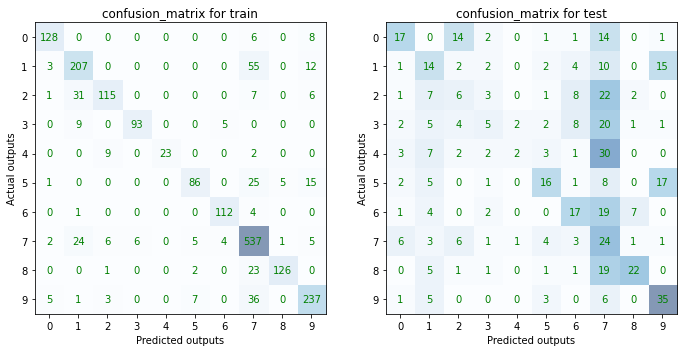

In [34]:
cm = [confusion_matrix(Y3e_train, _model.predict(X_train))]
cm.append(confusion_matrix(Y_test, _model.predict(X_test)))
confusion_matrix_plot(cm)

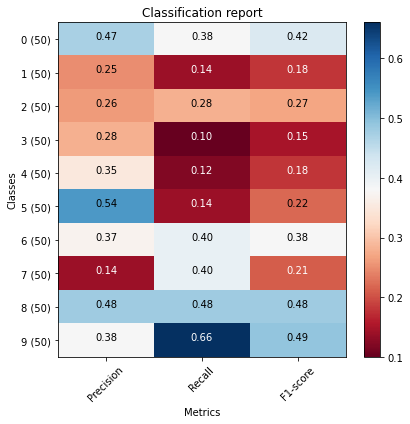

    accuracy                           0.31       500
   macro avg       0.35      0.31      0.30       500
weighted avg       0.35      0.31      0.30       500



In [ ]:
classification_report_plot(classification_report(Y_test, _model.predict(X_test)))